In [45]:
import pandas as pd
from pathlib import Path

In [46]:
import re
pattern = re.compile(
    r"Phase_lag_(?P<phase_lag>\d+\.\d+)_Amplitude_(?P<amplitude>\d+\.\d+)_frequency_(?P<frequency>\d+\.\d+)_time_(?P<date>\d+)"
)

dfs = []
for p in Path(".").rglob("*.csv"):
    df = pd.read_csv(p)
    for k, v in re.match(pattern, p.name).groupdict().items():
        df[k] = float(v)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [47]:
df.describe()

,time,x,y,phase_lag,amplitude,frequency,date
count,12366.000000,12366.000000,12366.000000,12366.000000,12366.0,12366.0,1.236600e+04
mean,5.748719,2.293481,1.115767,0.908277,40.0,1.0,1.745852e+09
std,3.877917,1.324188,0.542592,0.250176,0.0,0.0,5.520449e+02
min,0.000000,0.591548,0.037600,0.500000,40.0,1.0,1.745852e+09
25%,2.598578,1.214066,0.808393,0.750000,40.0,1.0,1.745852e+09
50%,5.107022,1.953124,1.133604,1.000000,40.0,1.0,1.745852e+09
75%,8.367637,3.134028,1.541242,1.000000,40.0,1.0,1.745853e+09
max,16.125950,5.898567,2.020303,1.250000,40.0,1.0,1.745854e+09


In [48]:
import plotly.express as px
from plotly.subplots import make_subplots


df_scatter = df.copy()
df_scatter["phase_lag"] = df_scatter["phase_lag"].astype(str)

def get_fig(phase_lag):
    fig = px.scatter(df_scatter, x="x", y="y", color="phase_lag", title="Impact of the Phase Lag on the robot trajectory", labels={"phase_lag": "Phase Lag"})
    fig.update_traces(marker=dict(size=5), visible='legendonly')
    fig.update_traces(selector=dict(name=phase_lag), visible=True)
    fig.update_layout(title=f"Phase Lag: {phase_lag}")
    return fig

main_fig = make_subplots(rows=2, cols=2)

for i, phase_lag in enumerate(df_scatter["phase_lag"].unique()):
    fig = get_fig(phase_lag)
    main_fig.add_trace(fig.data[0], row=i//2 + 1, col=i%2 + 1)
    main_fig.update_xaxes(title_text="X", row=i//2 + 1, col=i%2 + 1)
    main_fig.update_yaxes(title_text="Y", row=i//2 + 1, col=i%2 + 1)

main_fig

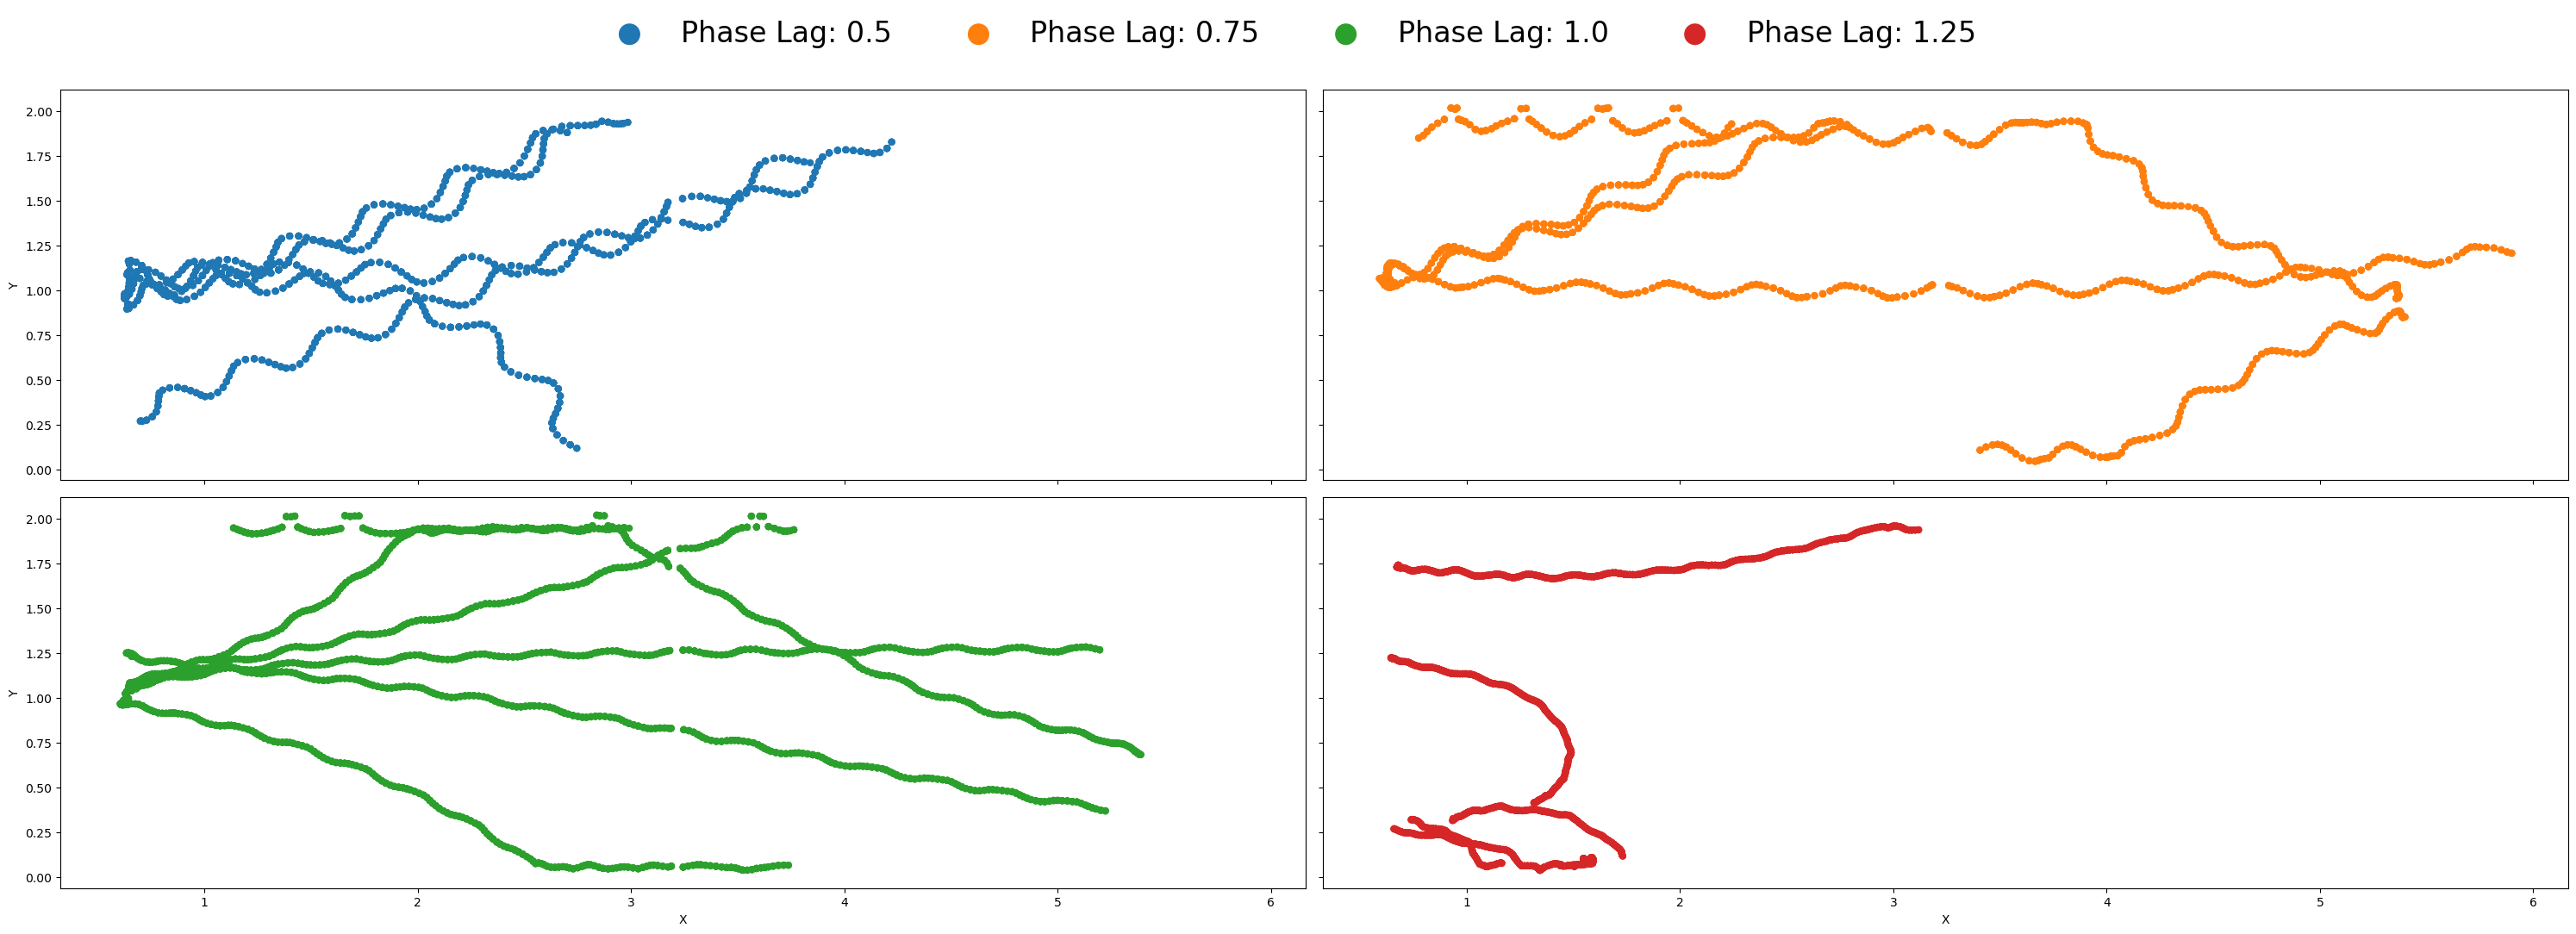

In [52]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(30, 10), sharex=True, sharey=True)

df_scatter = df.copy()
df_scatter.sort_values(by=["phase_lag", "x"], inplace=True)
for i, (phase_lag, ax) in enumerate(zip(df_scatter["phase_lag"].unique(), axes.flatten())):
    sns.scatterplot(
        data=df_scatter[df_scatter["phase_lag"] == phase_lag],
        x="x",
        y="y",
        color=sns.color_palette()[i],
        edgecolor='none',
        ax=ax,
    )
    # ax.set_title(f"Phase Lag: {phase_lag}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

plt.figlegend(["Phase Lag: " + str(phase_lag) for phase_lag in df_scatter["phase_lag"].unique()], loc="center", ncol=4, fontsize=24, markerscale=3,  bbox_to_anchor=(0.5, 1.05), frameon=False)
plt.tight_layout()
plt.savefig("trajectories.svg", format="svg", bbox_inches="tight")
plt.show()



In [50]:
df_per_run.last()

NameError: name 'df_per_run' is not defined

/var/folders/7m/y6tqdj492sn0zb626vngvmpc0000gn/T/ipykernel_26798/3876600188.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




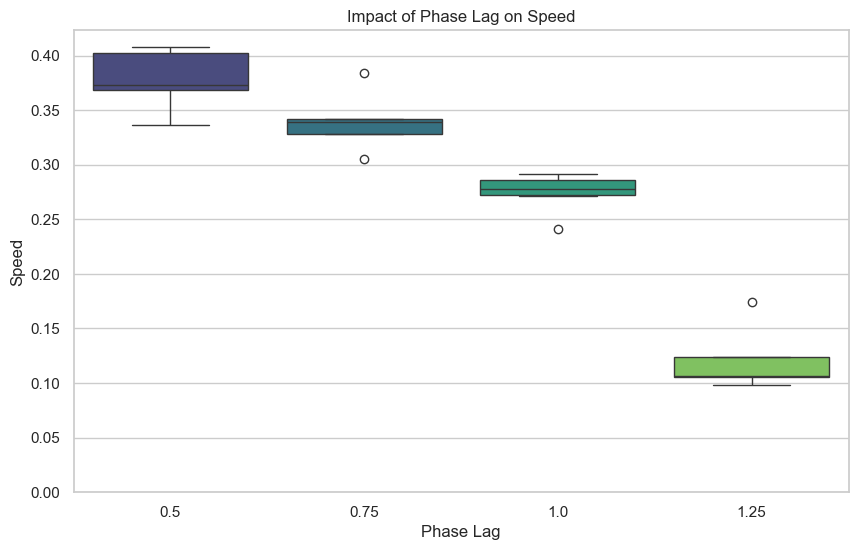

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_per_run,
    x="phase_lag_first",
    y="speed",
    palette="viridis",
)
plt.title("Impact of Phase Lag on Speed")
plt.xlabel("Phase Lag")
plt.ylabel("Speed")
plt.ylim(0)
plt.savefig("impact_of_phase_lag_on_speed.pgf", format="pgf")
plt.show()
